Sky Kapoor and Chris Compierchio

This program will Numerically calculate the period for N = 8 and N = 16 for x0 = 1 cm using eqn. (7), and compare this to the classical value.

In [54]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from gaussxw import gaussxw

In [55]:
#Define constants
x0 = 0.01
m = 1
k = 12
c = 3*10**8

In [56]:
#Define Eq. 7
def g(x):
    return 1/(np.sqrt(k*np.abs(x0**2 - x**2)))


In [57]:
#Define the two given N values
N1 = 8
N2 = 16

#Define integral bounds
a = 0
b = x0

#Calculate the sample points and weights, then map them to the required
#integration domain for N1

x, w = gaussxw(N1)
xp = 0.5*(b-a)*x + 0.5*(b+a)
wp = 0.5*(b-a)*w

#Perform the Integration for N1

s = 0.0
for j in range(N1):
    s += 4*wp[j]*g(xp[j])

#calculate the classical value
classical_value = 2*np.pi*np.sqrt(m/k)
print(classical_value, s)

#Calculate the sample points and weights, then map them to the required
#integration domain for N2

x2, w2 = gaussxw(N2)
xp2 = 0.5*(b-a)*x2 + 0.5*(b+a)
wp2 = 0.5*(b-a)*w2

#Perform the Integration for N2

t = 0.0
for j in range(N2):
    t += 4*wp2[j]*g(xp2[j])

print(classical_value, t)

1.8137993642342176 1.7301762343365563
1.8137993642342176 1.770715490242243


In [58]:
#Calculate fractional error for N1
frac_err1 = (classical_value - s)/s
frac_err1

0.04833214573064978

In [59]:
#Calculate fractional error for N2
frac_err2 = (classical_value - t)/t
frac_err2

0.024331336247631997

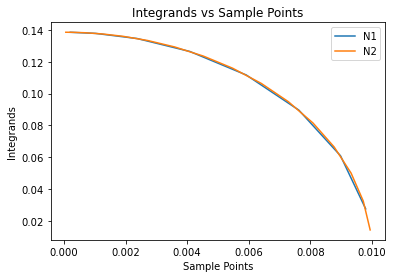

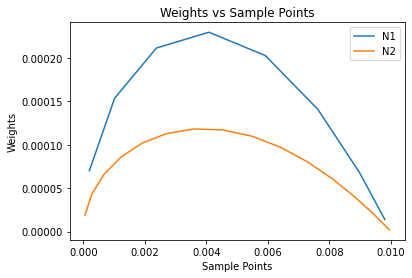

In [60]:
#create arrays for the integrands and weighted values for each N
integrands1 = np.zeros(N1)
weighted1 = np.zeros(N1)

integrands2 = np.zeros(N2)
weighted2 = np.zeros(N2)

#Calculate the integrands and weighted values for each N
for d in range(N1):
    integrands1[d] = 4/g(xp[d])
    weighted1[d] = 4*wp[d]/g(xp[d])

for e in range(N2):
    integrands2[e] = 4/g(xp2[e])
    weighted2[e] = 4*wp2[e]/g(xp2[e])

#Plot results
plt.figure()
plt.plot(xp, integrands1, label="N1")
plt.plot(xp2, integrands2, label="N2")

plt.title("Integrands vs Sample Points")
plt.xlabel("Sample Points")
plt.ylabel("Integrands")
plt.legend(loc="best")
plt.show()

plt.figure()
plt.plot(xp, weighted1, label="N1")
plt.plot(xp2, weighted2, label="N2")

plt.title("Weights vs Sample Points")
plt.xlabel("Sample Points")
plt.ylabel("Weights")
plt.legend(loc="best")
plt.show()

In [61]:
#Define N3 as 200
N3 = 200

#calculate weights and sample points for N3
x3, w3 = gaussxw(N3)
xp3 = 0.5*(b-a)*x3 + 0.5*(b+a)
wp3 = 0.5*(b-a)*w3

#Perform the Integration for N3
u = 0.0
for j in range(N3):
    u += 4*wp3[j]*g(xp3[j])

#Calculate percentage error for N3
perc_err3 = ((classical_value - u)/u)*100
perc_err3

0.19586825451687168

In [84]:
#DIDNT COMPLETE PART E, KEPT ENCOUNTERING ERRORS
#THIS IS WHAT WE TRIED FOR PART E:


#Define xc
#xc = c/np.sqrt(12)

#Set bounds
#a = 0
#b = np.linspace(1, 10*xc, 100)

#g_arr = np.zeros(b.size)
#def g(x):
    #for q in range(b.size):
        #g_arr[q] = 1/(np.sqrt(k*np.abs(b[q]**2 - x**2)))
    #return g_arr

#Calculate weights and sample points
#x4, w4 = gaussxw(N3)
#Perform the Integration for the period calculated between 1 and 10*xc
#u1 = np.zeros(b.size)
#for i in range(u1.size):
    #xp4 = 0.5*(b[i]-a)*x4 + 0.5*(b[i]+a)
    #wp4 = 0.5*(b[i]-a)*w4
    #for j in range(N3):
        #u1[i] = 4*wp4[j]*g(xp4[j])
#plot results

#plt.plot(b,u1)

#h = (b-a)/N3

#for i in range(h.size):
    #s = 0.5*g(a)-0.5*g(b[i])
    #for k in range(1, N3):
        #s+=g(a+k*h)